# Module 5: Dimensionality Reduction with PCA, Kernel PCA and FA(Factor Analysis)

Student: Svavar Hrafn Ágústsson

Date: 19. Sep 2023

## Data preparation

In [3]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab
data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [4]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])
# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)
# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])
# Define the total number of 5-minute intervals in a day
nintvals = 288

In [5]:
# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)
# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])
    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])
        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]
# Print the resulting 'vectorized_day_dataset' and the size of vector
print(vectorized_day_dataset)
print(vectorized_day_dataset.shape)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]
(365, 288)


In [6]:
# print the number of days with missing value
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value:',np.size(np.where(nans_per_day > 0),1))

number of days with missing value: 28


In [7]:
# Drop the days with missing valus
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
# days_not_nans = days[np.where(nans_per_day == 0)[0]]
print(vectorized_day_dataset_no_nans.shape)

(337, 288)


## Task 1: Perform PCA in dataset 1 for dimensionality reduction

In [8]:
# Import packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
data = pd.DataFrame(vectorized_day_dataset_no_nans)
data.head()  # Display the first few rows
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,...,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,33.314540,32.985163,32.566766,31.771513,31.545994,29.896142,28.798220,27.673591,26.836795,26.332344,...,44.919881,45.931751,44.670623,42.902077,40.703264,39.501484,37.543027,36.169139,35.952522,33.753709
std,15.895554,15.590837,15.211089,15.052824,14.602423,14.448942,14.522794,13.478609,13.888804,13.761443,...,19.550670,19.604682,18.469283,18.352514,18.369741,18.716577,17.610673,17.948285,18.085877,16.511590
min,5.000000,8.000000,6.000000,3.000000,6.000000,7.000000,6.000000,7.000000,3.000000,8.000000,...,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,22.000000,22.000000,22.000000,20.000000,21.000000,19.000000,18.000000,19.000000,17.000000,17.000000,...,31.000000,31.000000,32.000000,30.000000,29.000000,26.000000,24.000000,23.000000,23.000000,22.000000
50%,29.000000,29.000000,29.000000,29.000000,28.000000,26.000000,26.000000,25.000000,23.000000,23.000000,...,43.000000,44.000000,42.000000,41.000000,38.000000,36.000000,34.000000,32.000000,33.000000,31.000000
75%,41.000000,42.000000,40.000000,40.000000,39.000000,38.000000,36.000000,34.000000,32.000000,32.000000,...,58.000000,59.000000,55.000000,54.000000,50.000000,48.000000,46.000000,45.000000,46.000000,42.000000
max,101.000000,83.000000,92.000000,81.000000,83.000000,78.000000,73.000000,109.000000,91.000000,121.000000,...,107.000000,101.000000,103.000000,104.000000,103.000000,115.000000,101.000000,130.000000,129.000000,117.000000


In [10]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)
data_normalized

array([[ 0.35820798, -0.96258119, -0.43235105, ..., -0.23263163,
         0.16875098,  0.01493842],
       [-0.20883002, -0.06328257, -0.36651178, ...,  0.43695009,
         0.27949894,  0.3182063 ],
       [ 0.16919531,  0.70754483,  1.27946997, ...,  0.77174095,
         0.50099486, -0.65225092],
       ...,
       [-0.83887223,  0.06518867, -0.1031547 , ...,  0.10215923,
         0.33487292,  0.13624557],
       [ 0.16919531,  0.45060236, -0.49819032, ...,  0.10215923,
         1.11010866,  0.07559199],
       [-0.01981735, -0.06328257,  0.09436311, ...,  5.23561911,
         5.1524093 ,  5.0491852 ]])

In [11]:
pca = PCA(n_components=10)  # Adjust the number of components (dimensions) as needed
data_pca = pca.fit_transform(data_normalized)
print(data_pca)
print(data_pca.shape)

[[ 22.5990504   32.36356427 -11.4957345  ...  13.34936591  12.95103632
    2.89641497]
 [ 17.25353727   6.07639879   3.12115793 ...  -1.99218524  -3.70265659
   -0.19024006]
 [ 18.05538293   8.4369415    0.50658252 ...  -0.19761678  -1.41989653
   -0.84142421]
 ...
 [  3.4775234   -2.45274731   0.9951784  ...   1.14161152  -1.84253869
   -0.82809526]
 [  4.41769458   0.10587539  -0.84793378 ...   0.44717098  -1.01107513
   -1.04005444]
 [ 12.82740206  16.62396057   5.83039331 ...  -4.84840592  -1.08985085
    0.51700347]]
(337, 10)


In [12]:
# Investigate Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance}')

Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]


In [13]:
# Conduct Stability Analysis
num_runs = 10  # Number of times to run PCA with different random seeds

for i in range(num_runs):
    pca = PCA(n_components=10, random_state=i)  # Change random_state for each run
    X_pca = pca.fit_transform(data_normalized)
    explained_variance = pca.explained_variance_ratio_
    print(f'Run {i+1} - Explained Variance Ratio: {explained_variance}')

Run 1 - Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]
Run 2 - Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]
Run 3 - Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]
Run 4 - Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]
Run 5 - Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]
Run 6 - Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.01585592 0.01430133 0.01228154]
Run 7 - Explained Variance Ratio: [0.31725246 0.19340224 0.08298293 0.05444537 0.04555043 0.03011985
 0.02071443 0.015

## Task 2: Perform PCA in dataset 1 for outlier detection

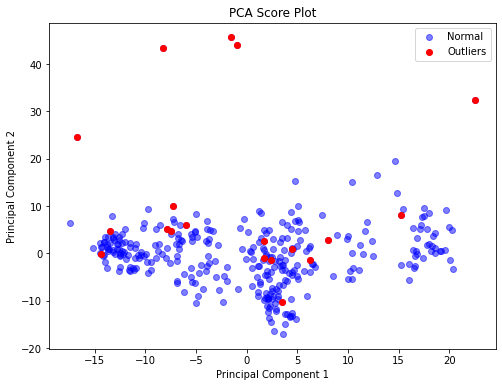

Number of detected outliers: 19
Detected outliers: [  0  40 113 175 176 202 213 218 230 231 248 253 258 279 280 288 299 315
 329]


In [14]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Apply PCA for reconstruction
pca = PCA(n_components=2)
X_reconstructed = pca.inverse_transform(pca.fit_transform(X_normalized))

# Calculate reconstruction errors
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Set a threshold for the reconstruction error
threshold = 1  # Adjust as needed

# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

# Visual Inspection of PCA Score Plots
pca_scores = pca.fit_transform(X_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(pca_scores[outliers, 0], pca_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Score Plot')
plt.show()

# Print the indices of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')


#### Using kernel PCA

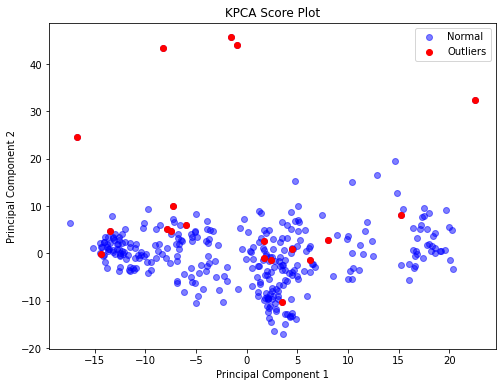

Number of detected outliers: 19
Detected outliers: [  0  40 113 175 176 202 213 218 230 231 248 253 258 279 280 288 299 315
 329]


In [15]:
from sklearn.decomposition import KernelPCA

# Load and preprocess the data
data = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(data)

# Step 1: Visual Inspection of Kernel PCA Score Plots
# Perform Kernel PCA
# Kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'.
kpca = KernelPCA(kernel='linear', n_components=2, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_normalized)


# Step 2: Detecting Outliers through Computing Reconstruction Errors
# Reconstruct the data from the reduced kernel PCA space
X_reconstructed = kpca.inverse_transform(X_kpca)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(X_normalized - X_reconstructed), axis=1)

# Define a threshold for outliers
threshold = 1  # Adjust as needed
kpca_scores = kpca.fit_transform(X_normalized)
# Identify outliers
outliers = np.where(reconstruction_error > threshold)[0]

plt.figure(figsize=(8, 6))
plt.scatter(kpca_scores[:, 0], kpca_scores[:, 1], c='b', alpha=0.5, label='Normal')
plt.scatter(kpca_scores[outliers, 0], kpca_scores[outliers, 1], c='r', label='Outliers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('KPCA Score Plot')
plt.show()
# Print the number of detected outliers
print(f'Number of detected outliers: {outliers.shape[0]}')
print(f'Detected outliers: {outliers}')



## Task 3: Identify the underlying latent factors that explain the observed correlations among several variables using FA 

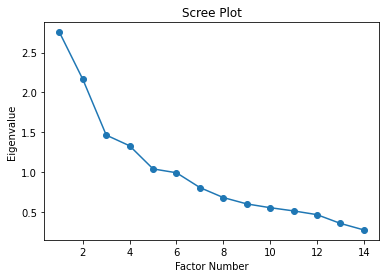

Factor Loadings:                      Factor 1  Factor 2  Factor 3  Factor 4  Factor 5
Price                0.578931  0.234152 -0.108803 -0.005588 -0.069328
Safety              -0.306536  0.229736  0.167865  0.065558 -0.243916
Exterior_Looks       0.090185  0.050722  0.026241 -0.542464  0.312042
Space_comfort       -0.022750  0.881709  0.041921 -0.055038  0.034016
Technology           0.000961  0.278548  0.140475  0.061123  0.005776
After_Sales_Service -0.012211  0.040035  0.946527 -0.005035 -0.009768
Resale_Value         0.725386 -0.204593  0.081064 -0.052370 -0.102032
Fuel_Type            0.025645  0.517666  0.107412  0.017839 -0.134947
Fuel_Efficiency      0.381540  0.007924  0.329103  0.226688  0.216041
Color                0.033070 -0.052346  0.016076  0.783525  0.090678
Maintenance          0.552883  0.114794 -0.007430  0.263017  0.006467
Test_drive           0.059225 -0.017722  0.234800 -0.063657  0.438696
Product_reviews      0.331873  0.245901 -0.077326  0.123717  0.351592
Tes

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Step 1: Data Preprocessing
# Load and preprocess the data
data = pd.read_csv('Dataset 2.csv')

# Step 2: Exploratory Factor Analysis
# Initialize FactorAnalyzer object
fa = FactorAnalyzer()

# # Experiment with different rotation methods (e.g., Varimax, Promax, and Oblimin)
# # Varimax Rotation
# fa.set_params(rotation='varimax')
# fa.fit(data)

# # Promax Rotation
# fa.set_params(rotation='promax')
# fa.fit(data)

# # Oblimin Rotation
fa.set_params(rotation='oblimin')
fa.fit(data)

# Step 3: Determine the Number of Factors
# Kaiser's Criterion
eigenvalues, _ = fa.get_eigenvalues()
num_factors_kaiser = sum(eigenvalues > 1)  # Select factors with eigenvalues > 1

# Scree Plot Examination
plt.scatter(range(1, data.shape[1]+1), eigenvalues)
plt.plot(range(1, data.shape[1]+1), eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.show()

# Step 4: Compute Factor Loadings
fa.set_params(n_factors=num_factors_kaiser)  # Use the determined number of factors
fa.fit(data)
factor_loadings = fa.loadings_

# Step 5: Interpret the Factors
# (Based on factor loadings and variable names)
# Provide meaningful labels/names to the identified factors based on interpretation
factor_names = ['Factor 1', 'Factor 2','Factor 3', 'Factor 4','Factor 5']  # Adapt as needed

# Print factor loadings
factor_loadings = pd.DataFrame(factor_loadings, index=data.columns, columns=factor_names)
print("Factor Loadings:", factor_loadings)
# print(pd.DataFrame(factor_loadings, index=data.columns, columns=factor_names))

# You can further interpret and label the factors based on the loadings and variable names.

# Additional: Assessing Factorability
bartlett_test_statistic, p_value = calculate_bartlett_sphericity(data)
kmo_score = calculate_kmo(data)

print(f"\nBartlett's Test Statistic: {bartlett_test_statistic}")
print(f"P-value: {p_value}")
print(f"KMO Score: {kmo_score}")

In [20]:
factor_loadings.sort_values('Factor 1', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Resale_Value,0.725386,-0.204593,0.081064,-0.052370,-0.102032
Price,0.578931,0.234152,-0.108803,-0.005588,-0.069328
Maintenance,0.552883,0.114794,-0.007430,0.263017,0.006467
Fuel_Efficiency,0.381540,0.007924,0.329103,0.226688,0.216041
Product_reviews,0.331873,0.245901,-0.077326,0.123717,0.351592
Exterior_Looks,0.090185,0.050722,0.026241,-0.542464,0.312042
Test_drive,0.059225,-0.017722,0.234800,-0.063657,0.438696
Color,0.033070,-0.052346,0.016076,0.783525,0.090678
Fuel_Type,0.025645,0.517666,0.107412,0.017839,-0.134947
Technology,0.000961,0.278548,0.140475,0.061123,0.005776


In [21]:
factor_loadings.sort_values('Factor 2', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Space_comfort,-0.022750,0.881709,0.041921,-0.055038,0.034016
Fuel_Type,0.025645,0.517666,0.107412,0.017839,-0.134947
Technology,0.000961,0.278548,0.140475,0.061123,0.005776
Product_reviews,0.331873,0.245901,-0.077326,0.123717,0.351592
Price,0.578931,0.234152,-0.108803,-0.005588,-0.069328
Safety,-0.306536,0.229736,0.167865,0.065558,-0.243916
Maintenance,0.552883,0.114794,-0.007430,0.263017,0.006467
Exterior_Looks,0.090185,0.050722,0.026241,-0.542464,0.312042
After_Sales_Service,-0.012211,0.040035,0.946527,-0.005035,-0.009768
Testimonials,-0.233455,0.039087,-0.035677,0.078491,0.627388


In [22]:
factor_loadings.sort_values('Factor 3', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
After_Sales_Service,-0.012211,0.040035,0.946527,-0.005035,-0.009768
Fuel_Efficiency,0.381540,0.007924,0.329103,0.226688,0.216041
Test_drive,0.059225,-0.017722,0.234800,-0.063657,0.438696
Safety,-0.306536,0.229736,0.167865,0.065558,-0.243916
Technology,0.000961,0.278548,0.140475,0.061123,0.005776
Fuel_Type,0.025645,0.517666,0.107412,0.017839,-0.134947
Resale_Value,0.725386,-0.204593,0.081064,-0.052370,-0.102032
Space_comfort,-0.022750,0.881709,0.041921,-0.055038,0.034016
Exterior_Looks,0.090185,0.050722,0.026241,-0.542464,0.312042
Color,0.033070,-0.052346,0.016076,0.783525,0.090678


In [23]:
factor_loadings.sort_values('Factor 4', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Color,0.033070,-0.052346,0.016076,0.783525,0.090678
Maintenance,0.552883,0.114794,-0.007430,0.263017,0.006467
Fuel_Efficiency,0.381540,0.007924,0.329103,0.226688,0.216041
Product_reviews,0.331873,0.245901,-0.077326,0.123717,0.351592
Testimonials,-0.233455,0.039087,-0.035677,0.078491,0.627388
Safety,-0.306536,0.229736,0.167865,0.065558,-0.243916
Technology,0.000961,0.278548,0.140475,0.061123,0.005776
Fuel_Type,0.025645,0.517666,0.107412,0.017839,-0.134947
After_Sales_Service,-0.012211,0.040035,0.946527,-0.005035,-0.009768
Price,0.578931,0.234152,-0.108803,-0.005588,-0.069328


In [24]:
factor_loadings.sort_values('Factor 5', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
Testimonials,-0.233455,0.039087,-0.035677,0.078491,0.627388
Test_drive,0.059225,-0.017722,0.234800,-0.063657,0.438696
Product_reviews,0.331873,0.245901,-0.077326,0.123717,0.351592
Exterior_Looks,0.090185,0.050722,0.026241,-0.542464,0.312042
Fuel_Efficiency,0.381540,0.007924,0.329103,0.226688,0.216041
Color,0.033070,-0.052346,0.016076,0.783525,0.090678
Space_comfort,-0.022750,0.881709,0.041921,-0.055038,0.034016
Maintenance,0.552883,0.114794,-0.007430,0.263017,0.006467
Technology,0.000961,0.278548,0.140475,0.061123,0.005776
After_Sales_Service,-0.012211,0.040035,0.946527,-0.005035,-0.009768


# Assignment task: Compare the performance of PCA and kernel PCA for dimensionality reduction in dataset 1.

In [33]:
# Import necessary libraries
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#### Parameter Tuning

In [70]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# Load dataset and preprocessing
# Here I'll use the load_digits dataset for example purposes
data, labels = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# You would replace this with your actual dataset and preprocessing step
# data = your_preprocessed_dataset

# Initialize parameter grid
gamma_values = np.linspace(6, 8, 10)  # For Gaussian
degree_values = np.linspace(0, 6, 20)  # For Polynomial
coef0_values = np.linspace(0.5, 2, 15)  # For Polynomial and Sigmoid

# Gaussian Kernel tuning
best_gamma = None
best_score = -1

for gamma in gamma_values:
    kpca = KernelPCA(kernel='rbf', n_components=2, gamma=gamma)
    kpca_result = kpca.fit_transform(X_train)
    score = silhouette_score(kpca_result, y_train)
    
    if score > best_score:
        best_score = score
        best_gamma = gamma

print(f"Best gamma for Gaussian (RBF) kernel: {best_gamma}")

# Polynomial Kernel tuning
best_degree = None
best_coef0 = None
best_score = -1

for degree in degree_values:
    for coef0 in coef0_values:
        kpca = KernelPCA(kernel='poly', n_components=2, degree=degree, coef0=coef0)
        kpca_result = kpca.fit_transform(X_train)
        score = silhouette_score(kpca_result, y_train)
        
        if score > best_score:
            best_score = score
            best_degree = degree
            best_coef0 = coef0

print(f"Best degree for Polynomial kernel: {best_degree}, Best coef0: {best_coef0}")

# Sigmoid Kernel tuning
best_coef0_sigmoid = None
best_score = -1

for coef0 in coef0_values:
    kpca = KernelPCA(kernel='sigmoid', n_components=2, coef0=coef0)
    kpca_result = kpca.fit_transform(X_train)
    score = silhouette_score(kpca_result, y_train)
    
    if score > best_score:
        best_score = score
        best_coef0_sigmoid = coef0

print(f"Best coef0 for Sigmoid kernel: {best_coef0_sigmoid}")

Best gamma for Gaussian (RBF) kernel: 7.555555555555555
Best degree for Polynomial kernel: 0.631578947368421, Best coef0: 0.5
Best coef0 for Sigmoid kernel: 2.0


#### Model Comparason with Optimal Parameters

 I am not using the calculated optimal parameters.

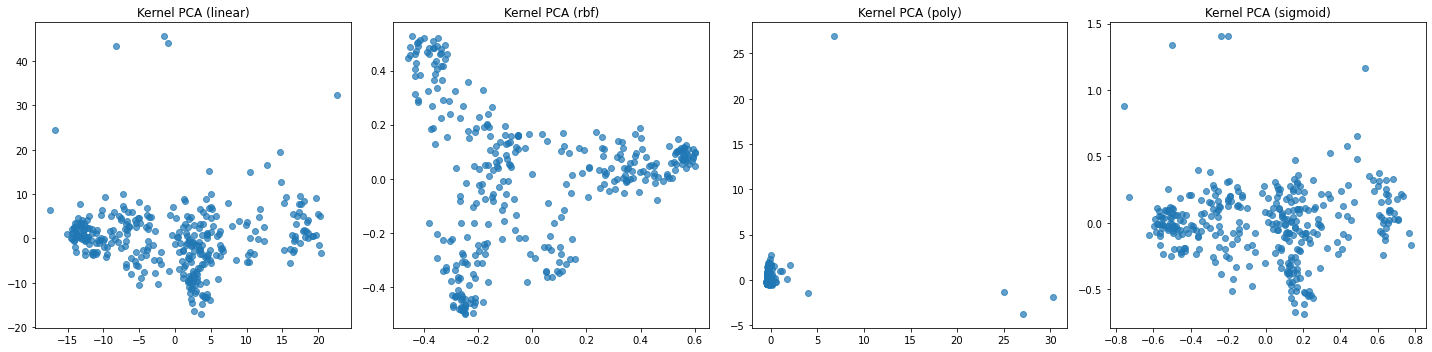

In [71]:
da = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
data = scaler.fit_transform(da)

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(data)

# Step 2: Perform Kernel PCA with different kernel functions
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

plt.figure(figsize=(20, 5))

for i, kernel in enumerate(kernels):
    if kernel == 'rbf':
        kpca = KernelPCA(kernel=kernel, n_components=2)
    elif kernel == 'poly':
        kpca = KernelPCA(kernel=kernel, n_components=2)
    elif kernel == 'sigmoid':
        kpca = KernelPCA(kernel=kernel, n_components=2)
    else:  # linear kernel
        kpca = KernelPCA(kernel=kernel, n_components=2)
    
    results[kernel] = kpca.fit_transform(data)
    
    # Visualization
    plt.subplot(1, 4, i+1)
    plt.scatter(results[kernel][:, 0], results[kernel][:, 1], marker='o', alpha=0.7)
    plt.title(f'Kernel PCA ({kernel})')

plt.tight_layout()
plt.show()

# Step 3: Pick the best kernel function based on your assessment


### Elbow method to find the optimal number of clusters

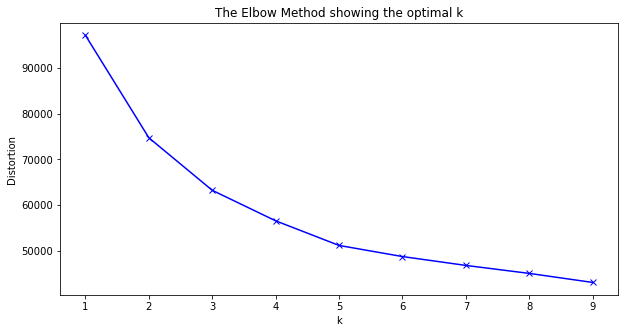

In [84]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute clustering and plot
distortions = []
K = range(1,10)  # Change the range based on your data and requirements
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


From the elbow method we sew that 5 clusters are optimal

In [98]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import KernelPCA
import numpy as np

##### Calculate Silhette scores
n_clusters = 5

# Store silhouette scores for each kernel transformation
sil_scores = {}

for kernel, transformed_data in results.items():
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(transformed_data)
    score = silhouette_score(transformed_data, kmeans.labels_)
    sil_scores[kernel] = score

##### Caluclate Stability Metric
def stability_metric(data, n_clusters, n_perturbations=10, noise_level=0.01):
    # Original clustering
    kmeans = KMeans(n_clusters=n_clusters)
    original_labels = kmeans.fit_predict(data)

    avg_score = 0

    for _ in range(n_perturbations):
        # Perturb the data
        perturbed_data = data + noise_level * np.random.randn(*data.shape)

        # Re-cluster
        perturbed_labels = kmeans.fit_predict(perturbed_data)

        # Compute similarity of cluster assignments
        score = adjusted_rand_score(original_labels, perturbed_labels)
        avg_score += score

    return "{:.3f}".format(avg_score / n_perturbations)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
n_clusters = 5  # Change based on your Elbow method result or other criteria
stability_results = {}

for kernel in kernels:
    kpca = KernelPCA(kernel=kernel, n_components=2)
    transformed_data = kpca.fit_transform(data)
    stability_results[kernel] = stability_metric(transformed_data, n_clusters)

# Combine both results into a DataFrame
df_results = pd.DataFrame({
    'Kernel': list(sil_scores.keys()),
    'Silhouette Score': list(sil_scores.values()),
    'Stability Score': list(stability_results.values())
})
styled = df_results.style.set_table_styles({
    'Kernel': [{'selector': '',
                'props': [('font-weight', 'bold'),
                          ('text-align', 'left')]},
               {'selector': 'th',
                'props': [('background-color', '#f5f5f5'),
                          ('font-weight', 'bold'),
                          ('text-align', 'left'),
                          ('border', '1px solid black')]},
               {'selector': 'td',
                'props': [('border', '1px solid black')]},
              ],
    'Silhouette Score': [{'selector': 'td',
                          'props': [('text-align', 'center')]}],
    'Stability Score': [{'selector': 'td',
                         'props': [('text-align', 'center')]}],
    'Explained Variance': [{'selector': 'td',
                            'props': [('text-align', 'center')]}]
}).highlight_max(subset=['Silhouette Score', 'Stability Score', 'Explained Variance'], color='lightgreen').highlight_min(subset=['Silhouette Score', 'Stability Score'], color='#ff9999')

styled

,Kernel,Silhouette Score,Stability Score
0,linear,0.462906,0.962
1,rbf,0.576980,0.986
2,poly,0.769514,0.973
3,sigmoid,0.471698,0.975


### PCA vs Kernel PCA Gaussian

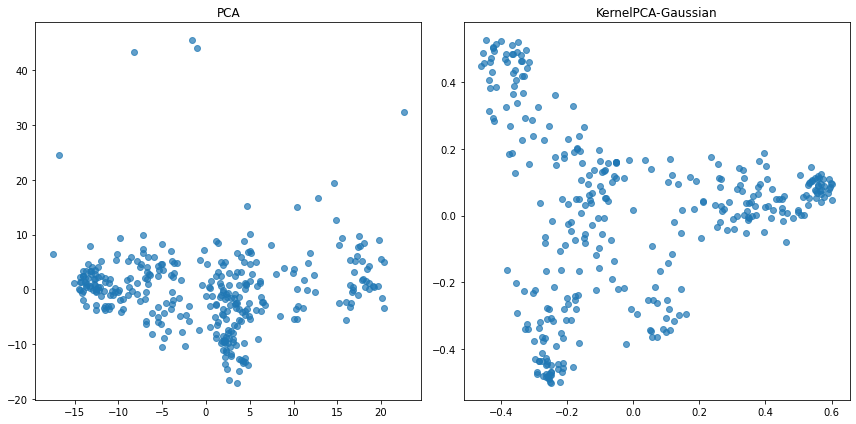

,Method,Silhouette Score,Stability Score
0,PCA,0.463,0.969
1,KernelPCA-Gaussian,0.577,0.989


In [107]:
# 1. Visualization
# Regular PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)
# KernelPCA Gaussian
kpca_gaussian = KernelPCA(kernel='rbf', n_components=2)
kpca_gaussian_result = kpca_gaussian.fit_transform(data)

plt.figure(figsize=(12, 6))

# Plot for PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA')

# Plot for KernelPCA Gaussian
plt.subplot(1, 2, 2)
plt.scatter(kpca_gaussian_result[:, 0], kpca_gaussian_result[:, 1], alpha=0.7)
plt.title('KernelPCA-Gaussian')

plt.tight_layout()
plt.show()

# 2. Silhouette Score Calculation
sil_scores = {}

methods = ["PCA", "KernelPCA-Gaussian"]
transformed_data_methods = [pca_result, kpca_gaussian_result]

for method, transformed_data in zip(methods, transformed_data_methods):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(transformed_data)
    score = silhouette_score(transformed_data, kmeans.labels_)
    sil_scores[method] = score

# 3. Stability Score Calculation
stability_results = {}
for method, transformed_data in zip(methods, transformed_data_methods):
    stability_results[method] = stability_metric(transformed_data, n_clusters)

# 4. Tabulate & Style Results
df_results = pd.DataFrame({
    'Method': methods,
    'Silhouette Score': ["{:.3f}".format(sil_scores[method]) for method in methods],
    'Stability Score': ["{:.3f}".format(stability_results[method]) for method in methods]
})

styled = df_results.style.set_table_styles({
    'Method': [{'selector': '',
                'props': [('font-weight', 'bold'),
                          ('text-align', 'left')]},
               {'selector': 'th',
                'props': [('background-color', '#f5f5f5'),
                          ('font-weight', 'bold'),
                          ('text-align', 'left'),
                          ('border', '1px solid black')]},
               {'selector': 'td',
                'props': [('border', '1px solid black')]}],
    'Silhouette Score': [{'selector': 'td',
                          'props': [('text-align', 'center')]}],
    'Stability Score': [{'selector': 'td',
                         'props': [('text-align', 'center')]}]
}).highlight_max(subset=['Silhouette Score', 'Stability Score'], color='lightgreen').highlight_min(subset=['Silhouette Score', 'Stability Score'], color='#ff9999')

styled
